In [2]:
!pip install scipy
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

drive.mount('/content/gdrive')
file_path = '/content/gdrive/My Drive/Colab Notebooks/CSV Files/BigThree.csv'
anime_data = pd.read_csv(file_path)
print(anime_data)

Mounted at /content/gdrive
                                   Arc  Start onChapter  TotalChapters  \
0                     Romance Dawn Arc              1.0              7   
1                      Orange Town Arc              8.0             14   
2                    Syrup Village Arc             22.0             20   
3                          Baratie Arc             42.0             27   
4                      Arlong Park Arc             69.0             27   
..                                 ...              ...            ...   
100        Zanpakutō Unknown Tales Arc              0.0              0   
101             Arrancar: Downfall Arc            341.0             83   
102         Gotei 13 Invading Army Arc              0.0              0   
103  The Lost Substitute Shinigami Arc            424.0             56   
104       The 1,000 Year Blood War Arc            480.0            208   

     TotalPages Manga%  Start onEpisode  TotalEpisodes  TotalMinutes(avg 24)  \
0   

In [3]:
one_piece = anime_data.loc[anime_data['BigThree'] == 'One Piece', 'TotalEpisodes']
naruto = anime_data.loc[anime_data['BigThree'] == 'Naruto', 'TotalEpisodes']
bleach = anime_data.loc[anime_data['BigThree'] == 'Bleach', 'TotalEpisodes']


print(one_piece)
print(naruto)
print(bleach)

0       3
1       5
2      10
3      12
4      15
5       2
6       6
7       8
8       2
9       4
10      2
11      8
12     14
13     39
14      5
15      3
16      5
17      9
18     43
19     11
20     15
21      5
22      2
23     35
24     49
25     13
26     11
27     45
28      3
29     21
30      2
31     14
32     31
33      4
34     33
35     27
36      6
37     52
38      4
39     47
40      3
41    118
42      4
43     29
44      3
45     95
46     12
47     26
48      2
49     41
50     70
Name: TotalEpisodes, dtype: int64
51    19
52    48
53    13
54    20
55     6
56    29
57    85
58     0
59    17
60    32
61    21
62    18
63    17
64    24
65    12
66     7
67    10
68     8
69    22
70    21
71    18
72    22
73    20
74    53
75     6
76    41
77    13
78    30
79    20
80    19
81    23
82     5
83     4
84     5
85     5
86     7
87     0
Name: TotalEpisodes, dtype: int64
88     20
89     21
90     22
91     28
92     18
93     22
94     20
95     16
96     22

In [4]:
print(anime_data['TotalEpisodes'].describe())

count    105.000000
mean      20.133333
std       19.949006
min        0.000000
25%        6.000000
50%       16.000000
75%       26.000000
max      118.000000
Name: TotalEpisodes, dtype: float64


In [5]:
# Possible values in categorical data - BigThree
print("Possible Values for BigThree:")
print(anime_data['BigThree'].unique())

Possible Values for BigThree:
['One Piece' 'Naruto' 'Bleach']


The anime with the most total episodes is: One Piece


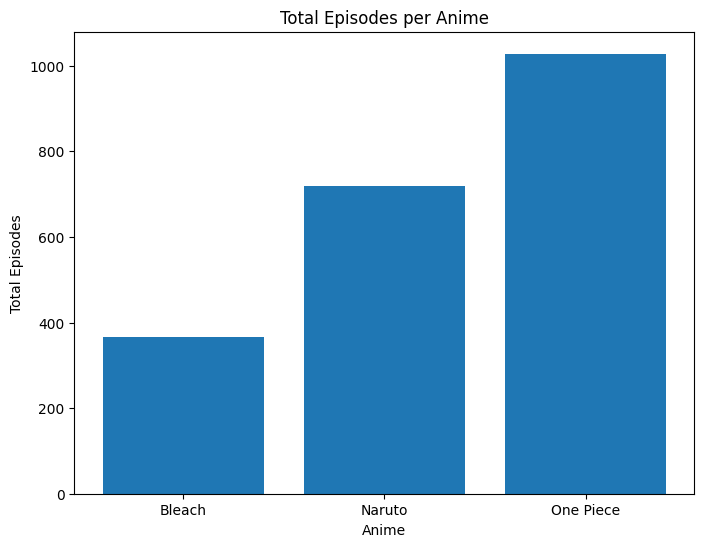

In [6]:
# Question 1: What Anime has the most total episodes?
anime_episode_counts = anime_data.groupby('BigThree')['TotalEpisodes'].sum()
max_episodes_anime = anime_episode_counts.idxmax()
print(f"The anime with the most total episodes is: {max_episodes_anime}")

# Histogram showing which anime has the most total episodes
plt.figure(figsize=(8, 6))
plt.bar(anime_episode_counts.index, anime_episode_counts.values)
plt.xlabel("Anime")
plt.ylabel("Total Episodes")
plt.title("Total Episodes per Anime")
plt.show()

In [7]:
# Range for Total Episodes
range_episodes = anime_data['TotalEpisodes'].max() - anime_data['TotalEpisodes'].min()
print(f"Range of Total Episodes: {range_episodes}")

# Standard Deviation:
std_dev = anime_data['TotalEpisodes'].std()
print(f"Standard Deviation of Total Episodes: {std_dev}")

# Average of total episodes for One Piece:
one_piece_avg = anime_data.loc[anime_data['BigThree'] == 'One Piece', 'TotalEpisodes'].mean()
print(f"Average total episodes for One Piece: {one_piece_avg}")

Range of Total Episodes: 118
Standard Deviation of Total Episodes: 19.949005501849477
Average total episodes for One Piece: 20.15686274509804


In [8]:
correlation_with_index = anime_data['TotalEpisodes'].corr(anime_data.index.to_series())
print(f"Correlation between TotalEpisodes and Index: {correlation_with_index}")

Correlation between TotalEpisodes and Index: 0.0989639178565552


In [9]:
# 1. One Piece vs Naruto
min_length = min(len(one_piece), len(naruto))
one_piece_naruto_corr = pearsonr(one_piece.values[:min_length], naruto.values[:min_length])
print(f"Correlation between One Piece and Naruto Total Episodes: {one_piece_naruto_corr}")

#2. One Piece vs Bleach
min_length = min(len(one_piece), len(bleach))
one_piece_bleach_corr = pearsonr(one_piece.values[:min_length], bleach.values[:min_length])
print(f"Correlation between One Piece and Bleach Total Episodes: {one_piece_bleach_corr}")

#3. Naruto vs Bleach
min_length = min(len(naruto), len(bleach))
naruto_bleach_corr = pearsonr(naruto.values[:min_length], bleach.values[:min_length])
print(f"Correlation between Naruto and Bleach Total Episodes: {naruto_bleach_corr}")

Correlation between One Piece and Naruto Total Episodes: PearsonRResult(statistic=-0.03214577595067422, pvalue=0.8501927341769289)
Correlation between One Piece and Bleach Total Episodes: PearsonRResult(statistic=0.7416290767317499, pvalue=0.000655289980557788)
Correlation between Naruto and Bleach Total Episodes: PearsonRResult(statistic=0.05721244680386885, pvalue=0.8273490478008622)


In [10]:
## Chi Squared Test
OP_NU_data = anime_data.loc[(anime_data['BigThree'] == 'One Piece') | (anime_data['BigThree'] == 'Naruto')]

OP_NU_data = pd.crosstab(OP_NU_data["TotalChapters"], OP_NU_data["TotalEpisodes"])
print(OP_NU_data)

TotalEpisodes  0    2    3    4    5    6    7    8    9    10   ...  45   \
TotalChapters                                                    ...        
0                0    5    4    4    6    2    1    2    0    0  ...    0   
1                0    0    0    0    0    0    0    0    0    0  ...    0   
5                0    1    0    0    0    2    0    0    0    0  ...    0   
6                1    0    0    0    0    0    0    0    0    0  ...    0   
7                0    0    1    0    0    0    0    0    0    0  ...    0   
9                0    0    0    1    0    0    0    0    0    0  ...    0   
10               1    0    0    0    0    0    0    0    0    0  ...    0   
11               0    0    0    0    0    0    0    0    0    0  ...    0   
14               0    0    0    0    1    0    0    0    0    0  ...    0   
15               0    0    0    0    0    0    0    1    0    0  ...    0   
16               0    0    0    0    0    0    1    0    0    0  ...    0   

In [11]:
c, p, dof, expected = scipy.stats.chi2_contingency(OP_NU_data)
print("The P Value is:", p)

The P Value is: 6.814076711339691e-24


In [86]:
X = anime_data[['TotalChapters']]
y = anime_data['TotalEpisodes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
prediction = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# TotalEpisodes based on TotalChapters
# TotalEpisodes for a new anime with 100 TotalChapters
new_anime_chapters = pd.DataFrame({'TotalChapters': [100]})
predicted_episodes = model.predict(new_anime_chapters)
print(f"Predicted Total Episodes for 100 chapters: {predicted_episodes[0]}")

Mean Squared Error: 836.472178916877
R-squared: -1.1656523706502684
Predicted Total Episodes for 100 chapters: 61.77524193763237


In [93]:
X = anime_data[['TotalChapters']]
y = anime_data['TotalEpisodes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

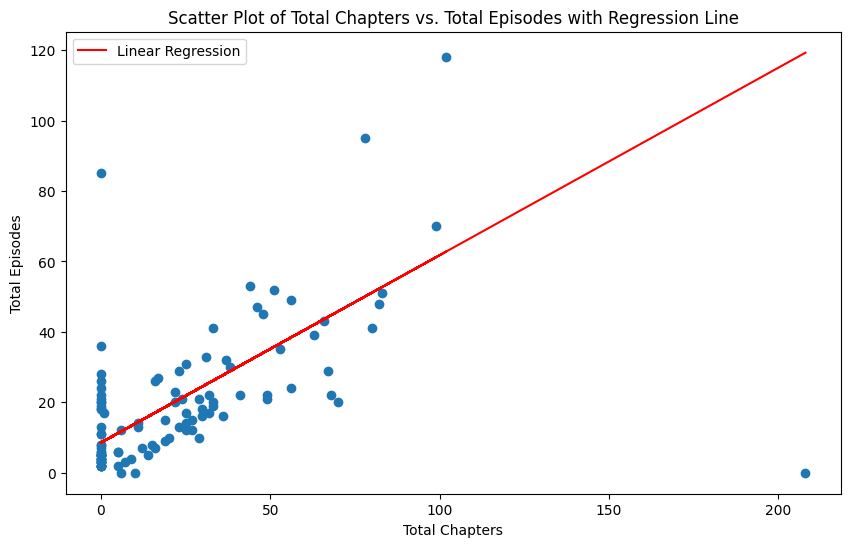

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(anime_data['TotalChapters'], anime_data['TotalEpisodes'])
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.xlabel('Total Chapters')
plt.ylabel('Total Episodes')
plt.title('Scatter Plot of Total Chapters vs. Total Episodes with Regression Line')
plt.legend()
plt.show()

In [92]:
prediction = model.predict(X_test)

mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Squared error: {mse}")
print(f"R-squared: {r2}")

Mean Squared error: 836.472178916877
R-squared: -1.1656523706502684


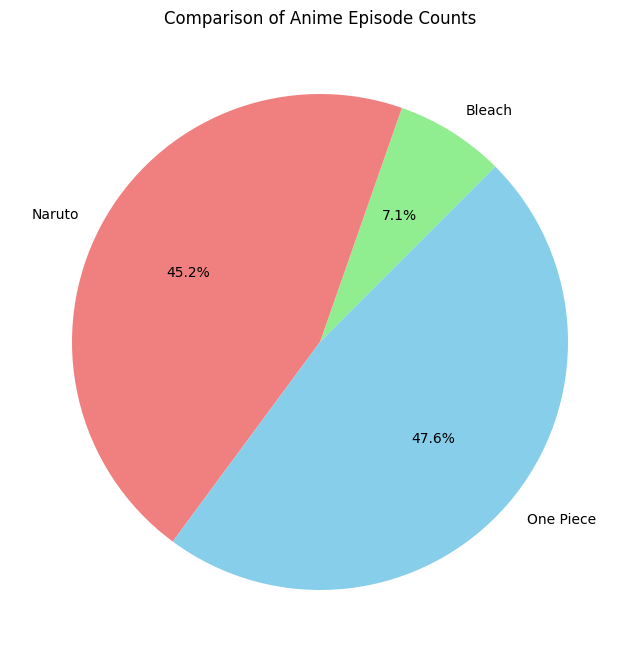

In [15]:
# Episode counts for each anime
one_piece_episodes = anime_data.loc[anime_data['BigThree'] == 'One Piece', 'TotalEpisodes'].iloc[0]
naruto_episodes = anime_data.loc[anime_data['BigThree'] == 'Naruto', 'TotalEpisodes'].iloc[0]
bleach_episodes = anime_data.loc[anime_data['BigThree'] == 'Bleach', 'TotalEpisodes'].iloc[0]

# Data for the pie chart
labels = ['Bleach', 'Naruto', 'One Piece']
sizes = [one_piece_episodes, naruto_episodes, bleach_episodes]
colors = ['lightgreen', 'lightcoral', 'skyblue']

# Pie chart
plt.figure(figsize=(8, 18))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=45)
plt.title('Comparison of Anime Episode Counts')
plt.show()

The anime with the most total episodes is: One Piece


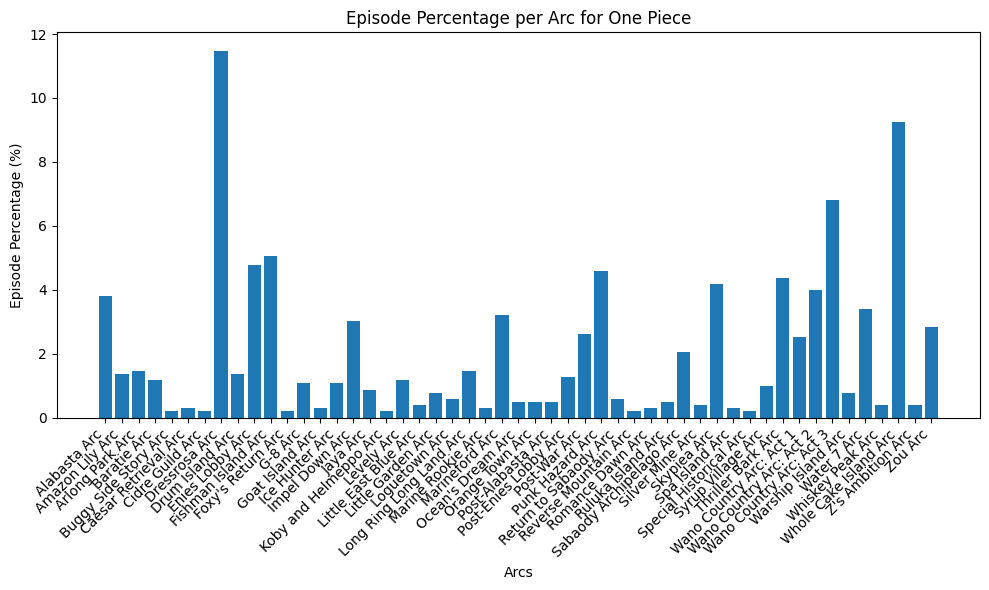

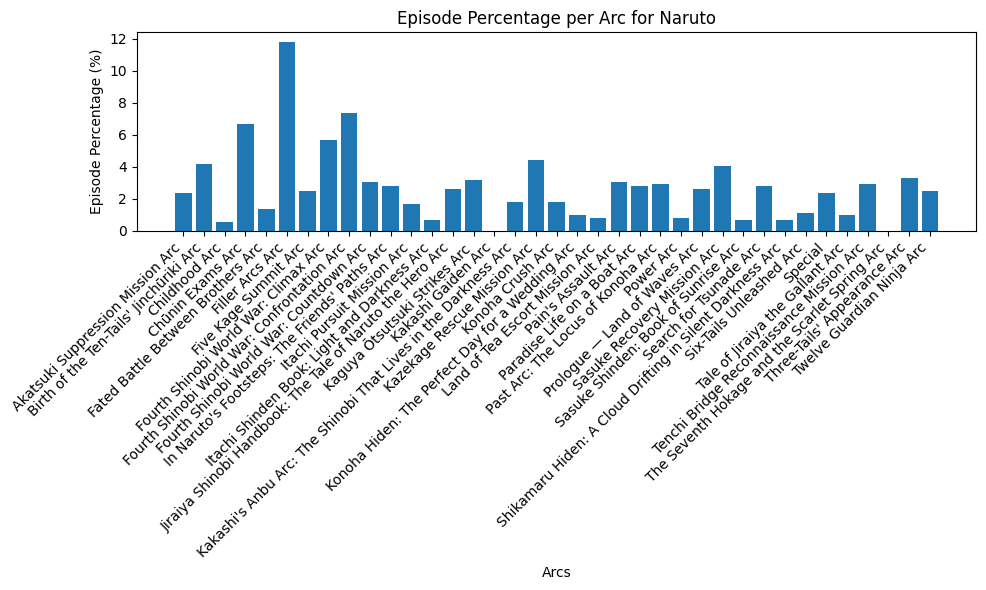

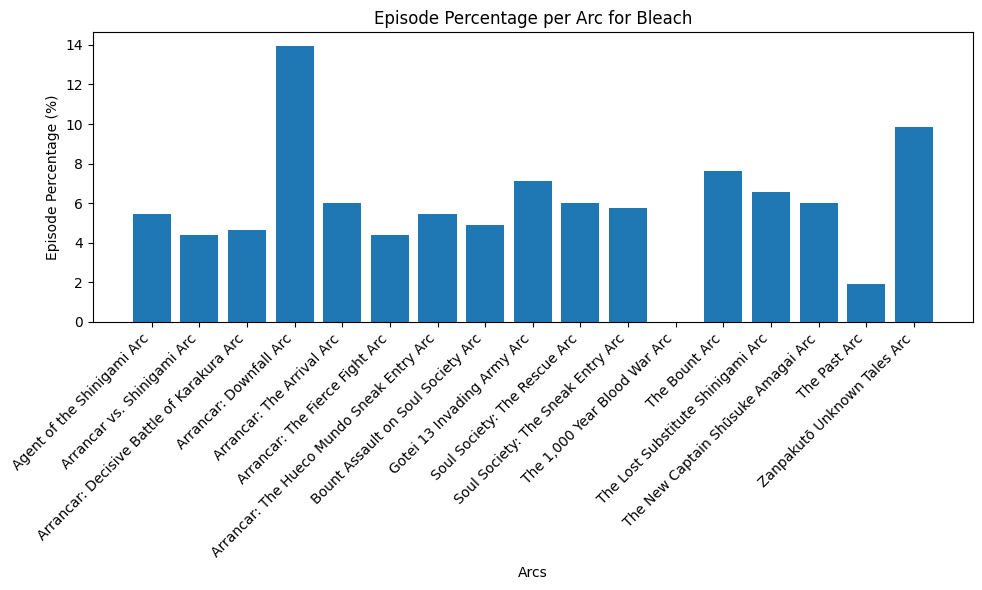

In [28]:
# Question 2: What Anime Arcs covers the most time in the show biased off of Naruto, Bleach, and One Piece?

# Group 'BigThree' and sum 'TotalEpisodes' to find total episode count per anime.
anime_episode_counts = anime_data.groupby('BigThree')['TotalEpisodes'].sum()

# Find the anime with the maximum total episodes.
max_episodes_anime = anime_episode_counts.idxmax()

print(f"The anime with the most total episodes is: {max_episodes_anime}")

anime_arc_episodes = anime_data.groupby(['BigThree', 'Arc'])['TotalEpisodes'].sum().reset_index()

anime_arc_episodes['AnimePercentage'] = anime_arc_episodes.groupby('BigThree')['TotalEpisodes'].transform(lambda x: (x / x.sum()) * 100)

for anime in anime_data['BigThree'].unique():
    anime_data_subset = anime_arc_episodes[anime_arc_episodes['BigThree'] == anime]

    plt.figure(figsize=(10, 6))
    plt.bar(anime_data_subset['Arc'], anime_data_subset['AnimePercentage'])
    plt.xlabel("Arcs")
    plt.ylabel("Episode Percentage (%)")
    plt.title(f"Episode Percentage per Arc for {anime}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()